In [91]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import math

In [92]:
loan=pd.read_csv("C:/Users/Adisai/Downloads/train_u6lujuX_CVtuZ9i.csv")

In [93]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [94]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [106]:
loan["Dependents"]=loan["Dependents"].str.replace(',','').astype(float)

ValueError: could not convert string to float: '3+'

In [107]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [108]:
pd.crosstab(loan['Credit_History'],loan['Loan_Status'],margins=True)#applicants with credit history 1 or more eligibile than credit history 0

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:>

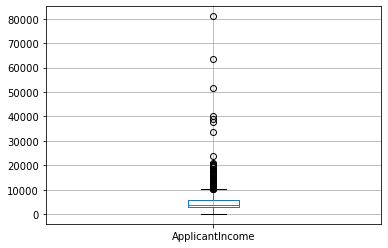

In [109]:
loan.boxplot(column='ApplicantIncome')

<AxesSubplot:>

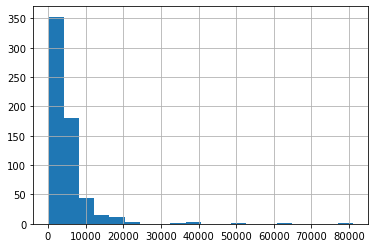

In [110]:
loan['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

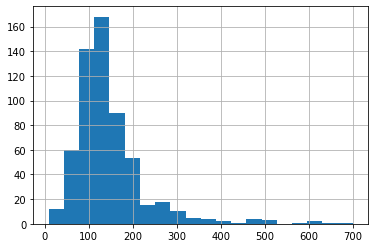

In [111]:
loan['LoanAmount'].hist(bins=20)

In [112]:
loan.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

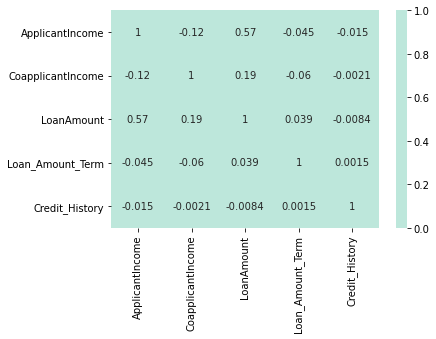

In [113]:
sn.heatmap(loan.corr(),vmin=1,vmax=0,center=0,annot=True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

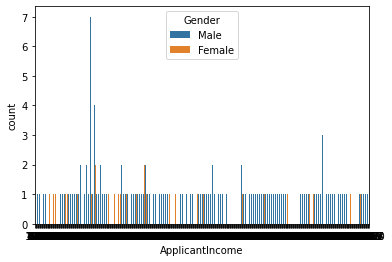

In [114]:
sn.countplot(x="ApplicantIncome",hue="Gender",data=loan)

<AxesSubplot:xlabel='Education', ylabel='count'>

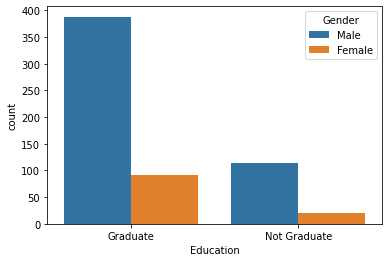

In [115]:
sn.countplot(x="Education",hue="Gender",data=loan)

## Data Wrangling


In [116]:
loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Fill the missing values for categorical terms using -MODE

In [117]:
loan['Gender']=loan['Gender'].fillna(loan['Gender'].mode()[0])
loan['Married']=loan['Married'].fillna(loan['Married'].mode()[0])
loan['Dependents']=loan['Dependents'].fillna(loan['Dependents'].mode()[0])
loan['Self_Employed']=loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])

# Filling the missing values for numerical terms using-MEAN

In [118]:
loan['LoanAmount']=loan['LoanAmount'].fillna(loan['LoanAmount'].mean())
loan['Loan_Amount_Term']=loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean())
loan['Credit_History']=loan['Credit_History'].fillna(loan['Credit_History'].mean())

In [119]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

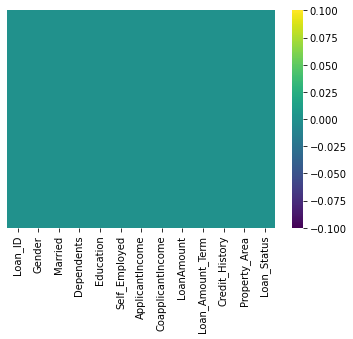

In [120]:
sn.heatmap(loan.isnull(),yticklabels=False,cmap="viridis")

# Label Encoding is used to convert categorical attributes to numeric type

In [133]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for col in cols:
    loan[col]=le.fit_transform(loan[col])


In [134]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [135]:
import sklearn
from sklearn.model_selection import train_test_split


In [136]:
data=loan

In [137]:
x=data[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
y=data['Loan_Status']

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [139]:
len(x_train),len(y_train)

(429, 429)

In [140]:
y_train

351    0
593    1
320    1
186    0
557    1
      ..
277    1
9      0
359    1
192    0
559    1
Name: Loan_Status, Length: 429, dtype: int64

In [141]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [142]:
reg.fit(x_train,y_train)

LogisticRegression()

In [143]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
454,1,0,0,0,1,7085,0.0,84.0,360.0
52,0,0,0,0,0,4230,0.0,112.0,360.0
536,1,1,0,0,0,6133,3906.0,324.0,360.0
469,1,1,0,0,0,4333,2451.0,110.0,360.0
55,1,1,2,0,0,2708,1167.0,97.0,360.0
...,...,...,...,...,...,...,...,...,...
242,1,0,0,0,0,2965,5701.0,155.0,60.0
515,1,1,3,0,0,3466,3428.0,150.0,360.0
582,0,1,0,0,0,3166,0.0,36.0,360.0
225,1,1,0,0,0,3250,0.0,170.0,360.0


In [150]:
y_pred=reg.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [151]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
242    1
515    1
582    1
225    0
134    1
Name: Loan_Status, Length: 185, dtype: int64

In [152]:
from sklearn.metrics import classification_report
classify=classification_report(y_test,y_pred)

In [153]:
classify

'              precision    recall  f1-score   support\n\n           0       0.33      0.02      0.04        51\n           1       0.73      0.99      0.84       134\n\n    accuracy                           0.72       185\n   macro avg       0.53      0.50      0.44       185\nweighted avg       0.62      0.72      0.62       185\n'

In [154]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[  1,  50],
       [  2, 132]], dtype=int64)

In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7189189189189189